In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [57]:
wine = datasets.load_wine()
wine_df=pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['target'] = wine['target']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [58]:
wine_df.shape

(178, 14)

In [59]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [60]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Test Train Split

In [62]:
X=wine_df
y=X.pop('target')

In [63]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=55)

In [65]:
X_train.shape

(142, 13)

In [66]:
X_test.shape

(36, 13)

## Train Classifier

In [68]:
knn=KNeighborsClassifier(n_neighbors=3)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
knn.score(X_test, y_test)

0.8333333333333334

## Tuning sensitivity of Model to n_neighbors

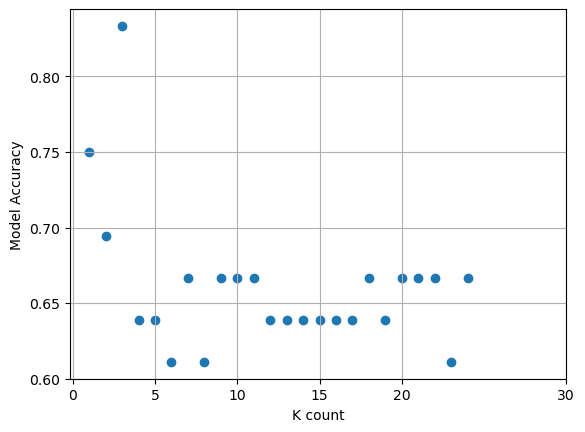

In [72]:
k_range=range(1,25)
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, score)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

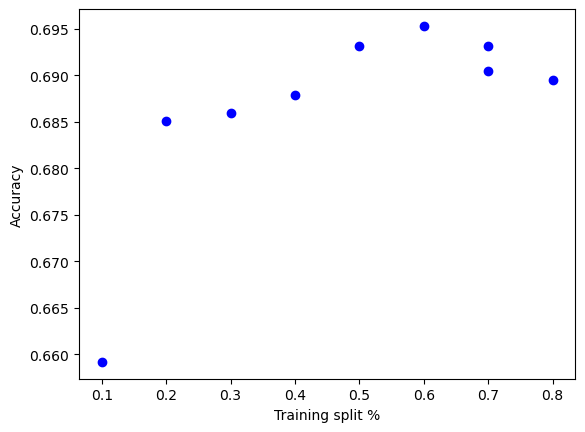

In [73]:
test_sizes=[0.8,0.7,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
knn=KNeighborsClassifier(n_neighbors=5)
for test_size in test_sizes:
    scores=[]
    for i in range (1,1000):
         X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= 1-test_size)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(test_size, np.mean(scores), "bo")

plt.xlabel("Training split %")
plt.ylabel("Accuracy")
plt.show() 

## Make Predictions

In [75]:
prediction=knn.predict(X_test)

In [76]:
prediction

array([0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 2])

In [101]:
y_test

9      0
128    1
32     0
155    2
67     1
      ..
8      0
158    2
29     0
160    2
68     1
Name: target, Length: 161, dtype: int32

In [77]:
cm=confusion_matrix(y_test, prediction)

In [78]:
cm

array([[44,  0, 11],
       [ 2, 50, 10],
       [ 0, 29, 15]], dtype=int64)

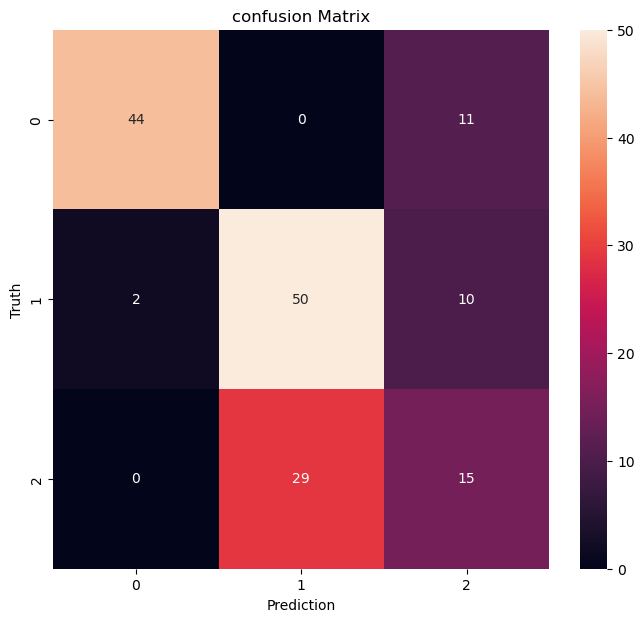

In [79]:
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True)
plt.title('confusion Matrix')
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.show()